# 6.2 权重的初始值【深度学习入门：基于python的理论与实现（第六章与学习相关的技巧）】

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## 梯度消失

In [3]:
x = np.random.randn(1000, 100) # 1000个数据，每个数据100个特征
hidden_layer_size =  5 # 5个隐藏层
node_num = 100 # 每个隐藏层100个节点
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

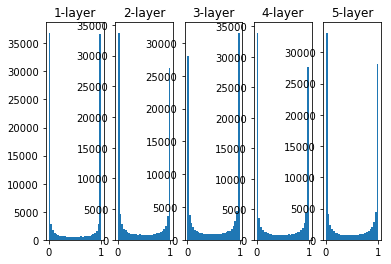

In [4]:
for i, a in activations.items():
    plt.subplot(1 ,len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

各层的激活值呈偏向0和1的分布。这里使用的sigmoid函数是S型函数，随着输出不断地靠近0或1，它的导数的值变得接近0 .因此，偏向1 和0的数据分布会造成反向传播中梯度的值不断变小，最后消失，称为**梯度消失**问题。

权重更改为标准差为0.01的高斯分布后

## 表现力受限

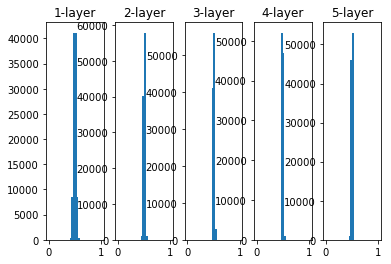

In [5]:
x = np.random.randn(1000, 100) # 1000个数据，每个数据100个特征
hidden_layer_size =  5 # 5个隐藏层
node_num = 100 # 每个隐藏层100个节点
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
for i, a in activations.items():
    plt.subplot(1 ,len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

这次激活值集中在0.5附近的分布。不会发生梯度消失的问题，但是激活值的分布有所偏向，在表现力上有很大问题。**为什么这么说呢？因为如果有多个神经元都输出几乎相同的值，那它们就没有存在的意义了。比如，如果100个神经元都输出几乎相同的值，那么也可以由1个神经元来表达基本相同的事情。因此，激活值在分布上有所偏向会出现“表现力受限”的问题。**

各层的激活值的分布都要求有适当的广度。为什么呢？因为通过在各层间传递多样性的数据，神经网络可以进行高效的学习。反过来，如果传递的是有所偏向的数据，就会出现梯度消失或者“表现力受限”的问题，导致学习可能无法顺利进行。

## Xavier初始值

为了使各层的激活值呈现出具有相同广度的分布，推到了合适的权重尺度。推导出的结论是，如果前一层的节点数为n，则初始值使用标准差为$\frac{1}{\sqrt{n}}$的分布

![image.png](https://pictures-1303030821.cos.ap-nanjing.myqcloud.com/img/202302042118155.png)

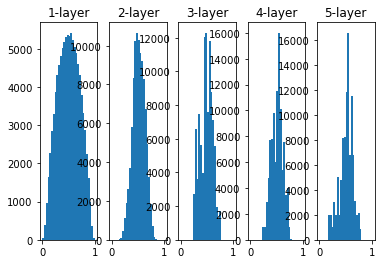

In [33]:
x = np.random.randn(1000, 100) # 1000个数据，每个数据100个特征
hidden_layer_size =  5 # 5个隐藏层
node_num = 100 # 每个隐藏层100个节点
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
for i, a in activations.items():
    plt.subplot(1 ,len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    # if i != 0: plt.yticks([], [])
    # plt.ylim(0, 6000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

越是后面的层，图像变得越歪斜，但是比之前更有广度的分布。因为各层间传递的数据有适当的广度，所以sigmoid函数的表现力不受限制，有望进行高效的学习。

## tanh
更换为tahn函数，形状为吊钟型？用作激活函数的函数最好有关于原点对称的性质

In [7]:
def tanh(x):
    return np.tanh(x)

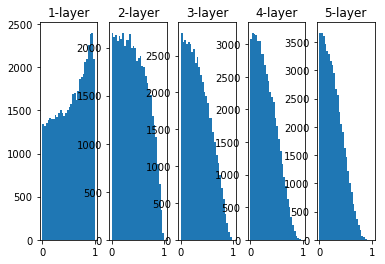

In [31]:
x = np.random.randn(1000, 100) # 1000个数据，每个数据100个特征
hidden_layer_size =  5 # 5个隐藏层
node_num = 100 # 每个隐藏层100个节点
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    z = np.dot(x, w)
    a = tanh(z)
    activations[i] = a
for i, a in activations.items():
    plt.subplot(1 ,len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    # if i != 0: plt.yticks([], [])
    # plt.ylim(0, 6000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## ReLU的权重初始值

Xaiver初始值是以激活函数是线性函数推导出来的，因为sigmoid和tanh左右对称，且中央附近可以视作线性函数，所以适合使用Xaiver初始值。

而当激活函数使用ReLU时， 推荐使用ReLU专用的初始值，称为He初始值

当前一层的节点数为n时，He初始值使用标准差为$\sqrt{\frac{2}{n}}$

当Xaiver初始值为$\sqrt{\frac{1}{n}}$时，可以解释为，因为ReLU的负值区域的值为0，为了使它更有广度，所以需要2倍的系数

In [11]:
def ReLU(x):
    return np.maximum(0 ,x)

## 权重初始值为标准差是0.01的高斯分布

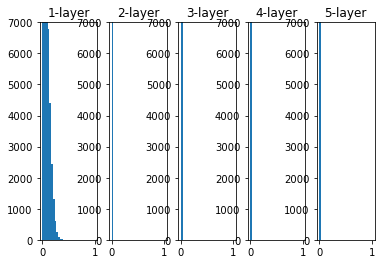

In [25]:
x = np.random.randn(1000, 100) # 1000个数据，每个数据100个特征
hidden_layer_size =  5 # 5个隐藏层
node_num = 100 # 每个隐藏层100个节点
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01
    z = np.dot(x, w)
    a = ReLU(z)
    activations[i] = a
for i, a in activations.items():
    plt.subplot(1 ,len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    # if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 权重初始值为Xaiver初始值时

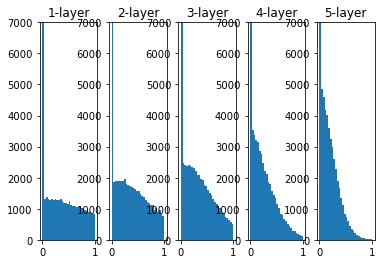

In [22]:
x = np.random.randn(1000, 100) # 1000个数据，每个数据100个特征
hidden_layer_size =  5 # 5个隐藏层
node_num = 100 # 每个隐藏层100个节点
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    z = np.dot(x, w)
    a = ReLU(z)
    activations[i] = a
for i, a in activations.items():
    plt.subplot(1 ,len(activations), i+1)
    plt.title(str(i+1) + '-layer')
     # if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 权重初始值为He初始值时

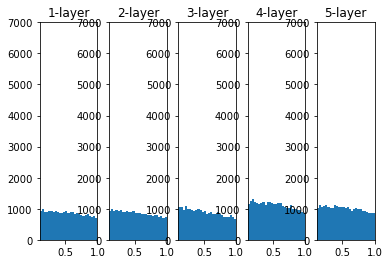

In [27]:
x = np.random.randn(1000, 100) # 1000个数据，每个数据100个特征
hidden_layer_size =  5 # 5个隐藏层
node_num = 100 # 每个隐藏层100个节点
activations = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    z = np.dot(x, w)
    a = ReLU(z)
    activations[i] = a
for i, a in activations.items():
    plt.subplot(1 ,len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    # if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 总结

![image.png](https://pictures-1303030821.cos.ap-nanjing.myqcloud.com/img/202302042118695.png)

+ 当std=0.01时，各层的激活值都很小，神经网络上传递的也是非常小的值，说明逆向传播时权重的梯度也同样很小。
+ 初始值为Xaiver时，随着层数的加深，偏向逐渐变大
+ 初始值为He时，各层中分布的广度相同

## 基于MNIST数据集的权重初始值比较

![image.png](https://pictures-1303030821.cos.ap-nanjing.myqcloud.com/img/202302042118516.png)